<a href="https://colab.research.google.com/github/keithvtls/AIDA2-Activities/blob/main/Laboratory%2002/58052_Lab02_Data_Halaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 03: Review of Statistics and Probability
$_{\text{©D.J. Lopez | 2021 | Fudamentals of Machine Learning}}$

Another important topic to lay foundation for Machine Learning is Statistics and Probability. Since Machine Learning is based on statistical learning it is inevitable to learn these. We will be covering the following topics:
* Population and Samples
* Central Tendencies
* Gaussian Distribution
* Probabilities
* Baye's Theorem
* Classification Errors


# Part 1: Basic Statistics

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Measures of Central Tendencies
A fundamental statistical concept is identifying the centrality of a dataset. We normally study the measures of central tendency as a general approximation of a given set. We usually determine them using mean, median, and mode. 
### 1.1.1 Mean
The average or arithmetic mean is computed as the ration of the sum of all values in collection to its size. It can be computed as:

$$\mu = \frac{1}{M}\sum^M_{i=0}x_i$$

Whereas $x_i$ is an element of the set of $X$ which has a size of $M$.

In [ ]:
scores = [100, 20, 30, 15, 17, 12, 1, 3]
scores = sorted(scores)
np.mean(scores)

24.75

In [ ]:
scores

[1, 3, 12, 15, 17, 20, 30, 100]

### 1.1.2 Median

The median of a collection is determined as the center element accordinf to its indices or position. 



In [ ]:
np.median(scores)

16.0

Find the median for the data 8, 5, 7, 10, 15, 21.

## Code

In [ ]:
# code 

data = [8, 5, 7, 10, 15, 21]
data = sorted(data)

print(f"median: {np.median(data)}")

median: 9.0


In [ ]:
## well-grouped scores
group1_scores = sorted([80,84,89,90,100,88,87,81,82])

print(f"mean: {np.mean(group1_scores)} \n median: {np.median(group1_scores)}")

mean: 86.77777777777777 
 median: 87.0


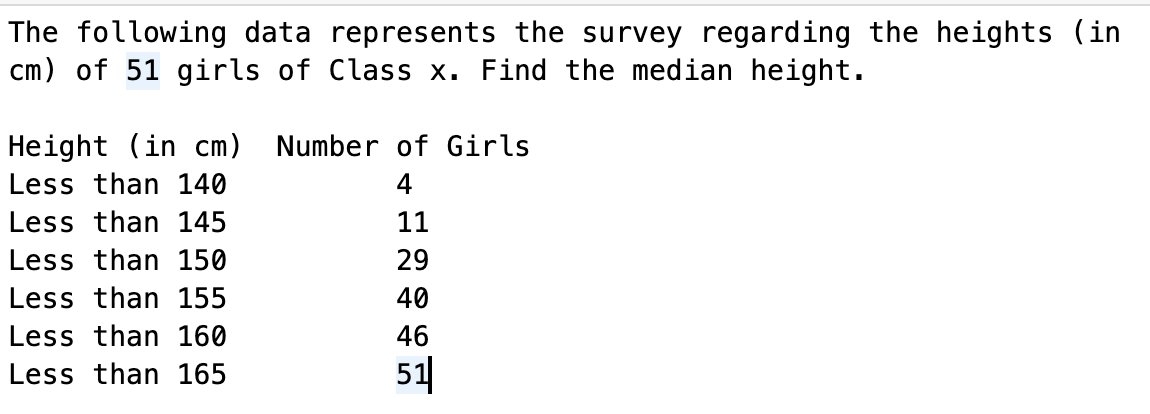

## Code

In [ ]:
##Get the mean and median

data_height = sorted([140, 145, 150, 155, 160, 165])
print(f"mean height: {np.mean(data_height)} \nmedian height: {np.median(data_height)}")

mean height: 152.5 
median height: 152.5


In [ ]:
## with outliers
group2_scores = sorted([80,84,89,90,100,88,87,15,5])

print(f"mean: {np.mean(group2_scores)} \n median: {np.median(group2_scores)}")

mean: 70.88888888888889 
 median: 87.0


### 1.1.3 Mode
The mode is simply the numerical element that appears more frequently in a collection.

In [ ]:
group3_scores = sorted([90,88,89,90,90,88,88,15,90,])
stats.mode(group3_scores)

ModeResult(mode=array([90]), count=array([4]))

In the given set of data: 2, 4, 5, 5, 6, 7, the mode of the data set is _______ since it has appeared in the set twice.

## Code

In [ ]:
## What is the mode

data = sorted([2, 4, 5, 5, 6, 7])
stats.mode(data)

ModeResult(mode=array([5]), count=array([2]))

## 1.2 Measures of Dispersion
Measuring dispersion in a dataset also means we are trying to determine its variability, stability, or the homogeneity.



### 1.2.1 Variance
The variance of a dataset is a measure of dispersion. The variance can be interpreted as the ratio of the Euclidean distance of each data point from the mean to its size. It can be represented as:
$$var = \sigma^2 = \frac{\sum^M_{i=0}(x_i-\mu)^2}{M}$$

In [ ]:
def plot_hist(arr):
  plt.figure(figsize=(15,6))
  plt.hist(arr, int(len(arr)*0.1))
  plt.axvline(arr.mean(), color='k', linestyle='dashed', linewidth=2)
  plt.show()

Find the variance and standard deviation of the following scores on an exam:
92, 95, 85, 80, 75, 50

## Code here

In [ ]:
exam_data = [92, 95, 85, 80, 75, 50]
print(f"exam variance: {np.var(exam_data)} \nexam standard deviation: {np.std(exam_data)}")

exam variance: 219.58333333333334 
exam standard deviation: 14.818344486930156


#### 1.2.2 Standard Deviation
Stadard deviation indicates the absolute variability of dispersion about the mean, it is the square root of the variance. It can be computed as:
$$std.dev = \sigma = \sqrt{\frac{\sum^M_{i=0}(x_i-\mu)^2}{M}}$$

The example below demonstrates the sensitivity of the variance to the data points

In [ ]:
grades_norm = np.random.normal(70, 1, 1000)

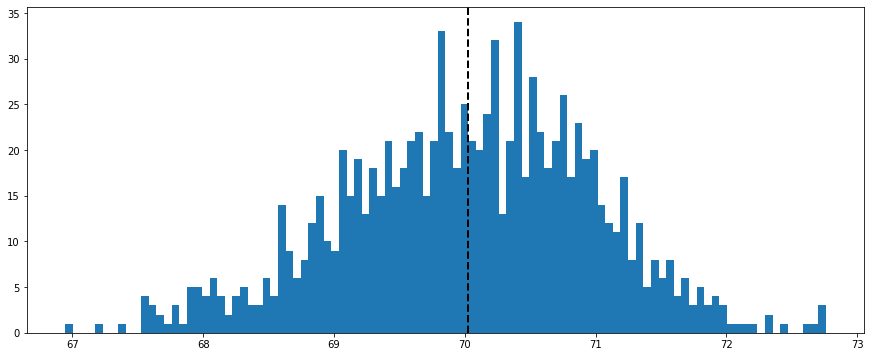

Mean: 70.02345653669548


In [ ]:
plot_hist(grades_norm)
print(f"Mean: {grades_norm.mean()}")

In [ ]:
np.var(grades_norm)

0.9261011700990969

In [ ]:
np.std(grades_norm)

0.962341503884716

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


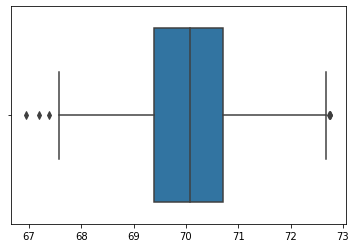

In [ ]:
sns.boxplot(grades_norm)

In [ ]:
grades_rand = np.random.randint(60, 100, 1000)

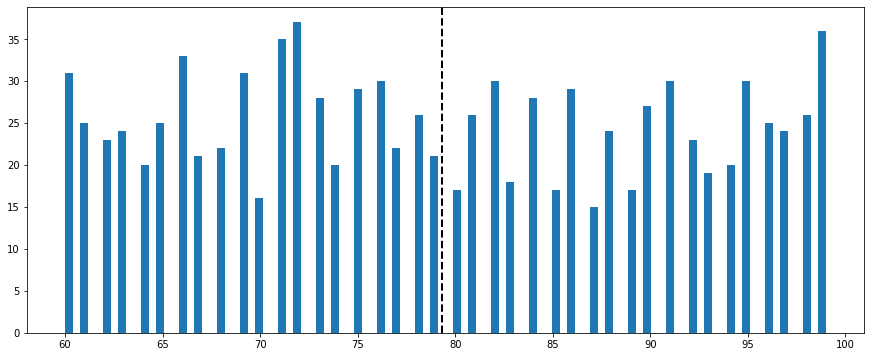

Mean: 79.331


In [ ]:
plot_hist(grades_rand)
print(f"Mean: {grades_rand.mean()}")

In [ ]:
np.var(grades_rand)

137.621439

In [ ]:
np.std(grades_rand)

11.731216433089964

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


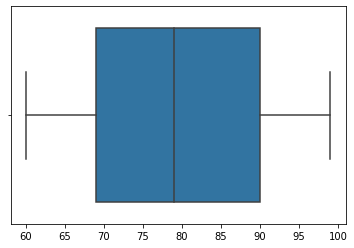

In [ ]:
sns.boxplot(grades_rand)

# Part 2: Scaling and Sampling
In data preparation, we would usually transform the data for easier processing and analysis. Common techniques would be scaling the whole dataset. For this section we will be using the California Housing Dataset for analysis

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


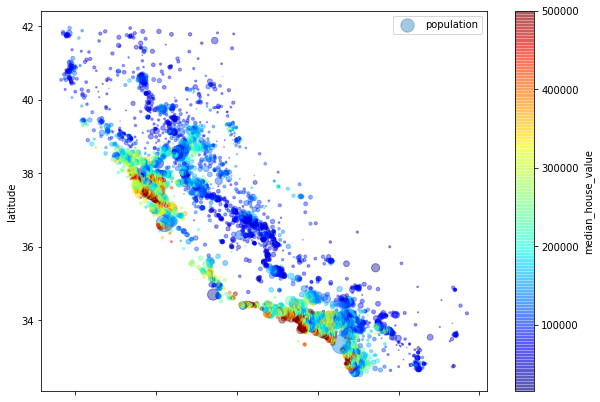

In [ ]:
df.plot(kind="scatter", x = "longitude", y= 'latitude', alpha= .4, 
            s=df["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )

## 3.1 Types of Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


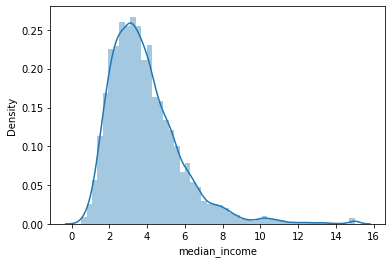

In [ ]:
sns.distplot(df['median_income'],50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


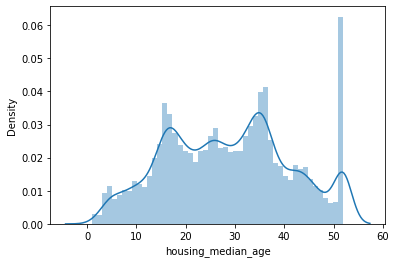

In [ ]:
sns.distplot(df['housing_median_age'],50)
plt.show()

## 3.2 Normalization
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [ ]:
X = df[['housing_median_age','median_income']]

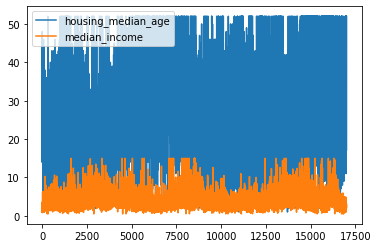

In [ ]:
X.plot()

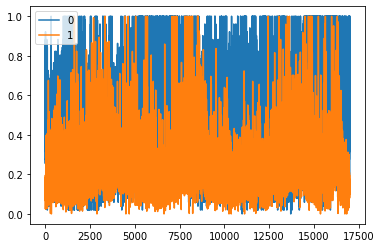

In [ ]:
from sklearn.preprocessing import MinMaxScaler
## Set the scaler by fitting the dataset
norm_scaler = MinMaxScaler()
norm = norm_scaler.fit(X)
## Transform the target dataset
X_norm = norm.transform(X)
pd.DataFrame(X_norm).plot()

## 3.3 Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

$$\frac{X-\mu}{\sigma}$$

In [ ]:
from sklearn.preprocessing import StandardScaler
## Set the scaler by fitting the dataset
std_scaler = StandardScaler()
standard = std_scaler.fit(X)
## Transform the target dataset
X_standard = standard.transform(X)

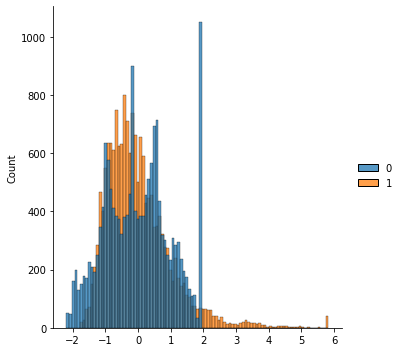

In [ ]:
sns.displot(X_standard)

# Part 4: Probabilities
Probaility theory is another fundamental concept in Machine Learning since our machine algorithms are probabilistic. In this section we are going to try to understand probabilities and programming concepts.

Probabilty explains the likelihood of a certain occurance. We denote probability with $P$. The probability of an occurance is always normal so it must be between 1 and 0.

## 4.1 Conditional Probability

Is a measure of the probability of an event occurring, given that another event (by assumption, presumption, assertion or evidence) has already occurred. It can be solved as:
$$P(A|B) = \frac{P(A\cap B)}{P(B)}$$



In [ ]:
albert_travel = {
    'countries': ['CN','JP','CN','MY','PH','CN','UK','CN','NZ','SG','TW'],
    'month': ['JAN','JAN','MAR','MAR','MAY','MAY','JUL','JUL','SEP','SEP','DEC']
    
}
barbara_travel = {
    'countries': ['PH','TW','PH','MY','PH','SG','PH','UK','PH'],
    'month': ['JAN','FEB','FEB','MAR','APR','MAY','JUN','SEP','OCT']
}
a_travel_df = pd.DataFrame(albert_travel)
b_travel_df = pd.DataFrame(barbara_travel)

In [ ]:
### DataFrame Intersection (Inner Join)
A = a_travel_df
B = b_travel_df
A_inner_B = pd.merge(A,B, how='inner', on='countries')['countries']
A_inner_B

0    PH
1    PH
2    PH
3    PH
4    PH
5    UK
6    SG
7    TW
Name: countries, dtype: object

In [ ]:
## Occurence Records
A = a_travel_df['countries']
B = b_travel_df['countries']

### Total Occurence
total = A.count() + B.count()

## Individual Probability
prob_A = A.count() / total
prob_B = B.count() / total

## Conditional Probability
cond_A_B = A_inner_B.count() / A.count()
cond_B_A = A_inner_B.count() / B.count()

cond_A_B

0.7272727272727273

## 4.2 Multiplication and Addition Rule



### Addition Rule
The probability of an event $A$ or $B$ happening $P(A \text{ or } B)$ is also interpreted as the union of the proability of $A$ and $B$. It can be denoted as:
$$P(A\cup B) = P(A) + P(B) - P(A \cap B)$$



In [ ]:
### Additiona Rule
int_A_B = A_inner_B.count() / total

prob_A_B = prob_A + prob_B - int_A_B
prob_A_B

0.6

# Part 5: Baye's Theorem
Baye's theorem is taking conditional probabilities further in understanding inferences. Baye's rule or Baye's theorem is knowing new knowledge from current experiences. The current that we have or know is what we call the prior knowledge or *a priori*  while the knowledge that we learn or infer is *a posteriori*. Baye's theorem is a technique updating our belief system. That is why it is grealty used in statistical learning to improve inferences with data. We mathematically model Baye's Theorem as:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
Let's try to dissect the theorem:

> $P(A)$: is the prior knowledge or *a priori*

> $P(B)$: is the scenario we are working on, which we use as a normalization term.

> $P(B|A)$: is the likelihood of an event to happen given the current situation.

> $P(A|B)$: is the posterior knowledge, or the belief update. We can also call it the *a posteriori*

In [ ]:
def bayes_theorem(p_b, p_g_given_b, p_g_given_not_b):
   # calculate P(not B)
   not_b = 1 - p_b
   # calculate P(G)
   p_g = p_g_given_b * p_b + p_g_given_not_b * not_b
   # calculate P(B|G)
   p_b_given_g = (p_g_given_b * p_b) / p_g
   return p_b_given_g
#P(B)
p_b = 1/4
# P(G|B)
p_g_given_b = 1
# P(G|notB)
p_g_given_not_b = 1/3
# calculate P(B|G)
result = bayes_theorem(p_b, p_g_given_b, p_g_given_not_b)
# print result
print('P(B|G) = %.2f%%' % (result * 100))

P(B|G) = 50.00%
